In [36]:
import pandas as pd

# Load the data from the CSV file
file_path = "weather_2020-11.csv"  # Update with the path to your CSV file
data = pd.read_csv(file_path)

# Drop duplicate rows
cleaned_data = data.drop_duplicates()

# Save the cleaned data to a new CSV file
output_file = "cleaned_data.csv"  # Update with the desired output file path
cleaned_data.to_csv(output_file, index=False)

file_path = "cleaned_data.csv"  # Update with the path to your CSV file
data = pd.read_csv(file_path)

# Drop duplicate rows
cleaned_data = data.dropna()

# Save the cleaned data to a new CSV file
output_file = "cleaned_data.csv"  # Update with the desired output file path
cleaned_data.to_csv(output_file, index=False)
print("Duplicates and nan dropped and cleaned data saved to", output_file)

Duplicates and nan dropped and cleaned data saved to cleaned_data.csv


In [39]:

file_path = "cleaned_data.csv"  
cleaned_data = pd.read_csv(file_path)

# Convert "ParameterValue" column to numeric, coercing errors to NaN
cleaned_data['ParameterValue'] = pd.to_numeric(cleaned_data['ParameterValue'], errors='coerce')

# Filter out NaN and non-numeric values, and calculate the average
average_relative_humidity = cleaned_data.loc[cleaned_data['ParameterName'] == 'RH_PT1H_AVG', 'ParameterValue'].mean()
print("Average Relative Humidity:", average_relative_humidity)

average_temperature = cleaned_data.loc[cleaned_data['ParameterName'] == 'TA_PT1H_AVG', 'ParameterValue'].mean()
print("Average Temperature:", average_temperature)

average_wind_speed = cleaned_data.loc[cleaned_data['ParameterName'] == 'WS_PT1H_AVG', 'ParameterValue'].mean()
print("Average Wind Speed:", average_wind_speed)

average_precipitation_amount = cleaned_data.loc[cleaned_data['ParameterName'] == 'PRA_PT1H_ACC', 'ParameterValue'].mean()
print("Average Precipitation Amount:", average_precipitation_amount)

average_pressure = cleaned_data.loc[cleaned_data['ParameterName'] == 'PA_PT1H_AVG', 'ParameterValue'].mean()
print("Average Pressure:", average_pressure)


Average Relative Humidity: 87.90138674884437
Average Temperature: 2.7400286944045913
Average Wind Speed: 3.9007173601147778
Average Precipitation Amount: nan
Average Pressure: 1012.6341463414634


In [40]:

# Convert "ParameterValue" column to numeric, coercing errors to NaN
cleaned_data['ParameterValue'] = pd.to_numeric(cleaned_data['ParameterValue'], errors='coerce')

# Filter out NaN and non-numeric values
cleaned_data = cleaned_data.dropna(subset=['ParameterValue'])

# Pivot the DataFrame to have parameters as columns and timestamps as rows
cleaned_data_pivot = cleaned_data.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Extract relevant columns for analysis
relevant_columns = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PA_PT1H_AVG']
relevant_columns = [col for col in relevant_columns if col in cleaned_data_pivot.columns]

# Convert data to NumPy array 
data_array = cleaned_data_pivot[relevant_columns].to_numpy()

min_values = np.nanmin(data_array, axis=0)
max_values = np.nanmax(data_array, axis=0)
median_values = np.nanmedian(data_array, axis=0)

# Print the results
for i, param in enumerate(relevant_columns):
    print(f"Parameter: {param}")
    print(f"Minimum value: {min_values[i]}")
    print(f"Maximum value: {max_values[i]}")
    print(f"Median value: {median_values[i]}")
    print()


Parameter: RH_PT1H_AVG
Minimum value: 61.0
Maximum value: 100.0
Median value: 89.0

Parameter: TA_PT1H_AVG
Minimum value: -8.4
Maximum value: 10.9
Median value: 2.8

Parameter: WS_PT1H_AVG
Minimum value: 0.4
Maximum value: 10.3
Median value: 3.7

Parameter: PA_PT1H_AVG
Minimum value: 977.3
Maximum value: 1032.6
Median value: 1013.7



In [41]:
hour_with_highest_value = {}
for param in relevant_columns:
    hour_with_highest_value[param] = cleaned_data_pivot[param].idxmax()


for param, hour in hour_with_highest_value.items():
    print(f"Parameter: {param}")
    print(f"Hour with the highest value: {hour}")
    print()

Parameter: RH_PT1H_AVG
Hour with the highest value: 2020-11-12T13:00:00Z

Parameter: TA_PT1H_AVG
Hour with the highest value: 2020-11-03T06:00:00Z

Parameter: WS_PT1H_AVG
Hour with the highest value: 2020-11-02T12:00:00Z

Parameter: PA_PT1H_AVG
Hour with the highest value: 2020-11-10T18:00:00Z



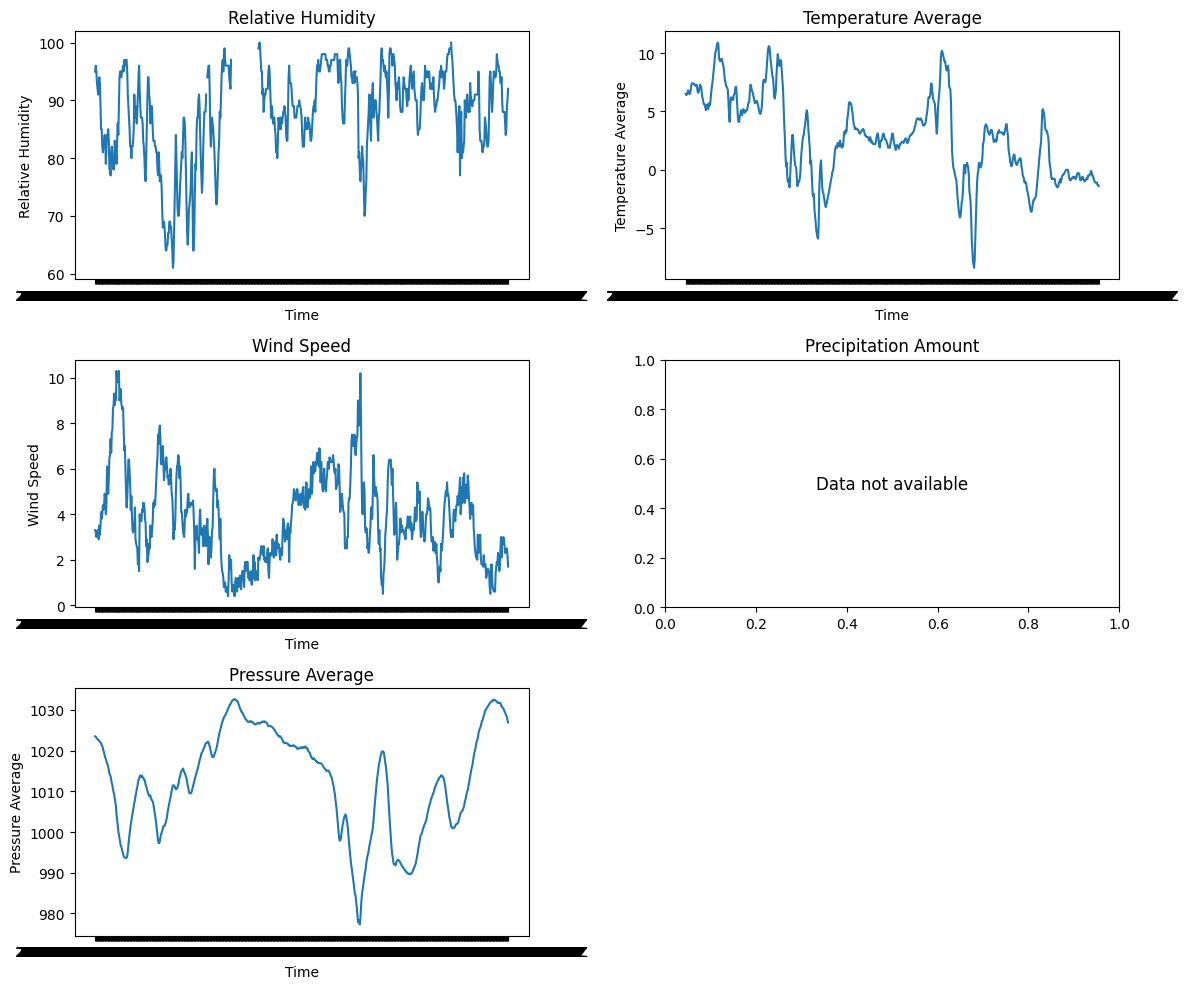

In [42]:
import matplotlib.pyplot as plt
parameters_to_plot = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
parameter_labels = ['Relative Humidity', 'Temperature Average', 'Wind Speed', 'Precipitation Amount', 'Pressure Average']

# Plot each parameter
plt.figure(figsize=(12, 10))

for i, param in enumerate(parameters_to_plot, start=1):
    plt.subplot(3, 2, i)
    if param in cleaned_data_pivot.columns:
        plt.plot(cleaned_data_pivot.index, cleaned_data_pivot[param])
        plt.title(parameter_labels[i-1])
        plt.xlabel('Time')
        plt.ylabel(parameter_labels[i-1])
    else:
        plt.text(0.5, 0.5, "Data not available", horizontalalignment='center', verticalalignment='center', fontsize=12, transform=plt.gca().transAxes)
        plt.title(parameter_labels[i-1])

plt.tight_layout()
plt.show()